In [51]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

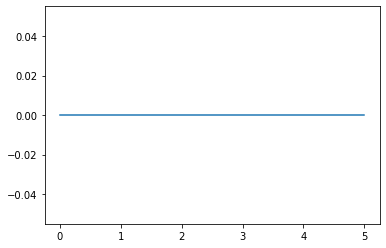

In [53]:
N = 50

w0 =  1 *2*np.pi
eps =  0.1*w0

a = destroy(N)
n = a.dag()*a
H0 = w_0 * n

def f(t, args):
    return eps*np.cos(2*w0*t)

H  =  [H0, [H0, f]]
psi0 = fock(N,0)
t =  np.linspace(0,5,1000)
results = sesolve(H, psi0, t)

plt.plot(t,expect(n, results.states))

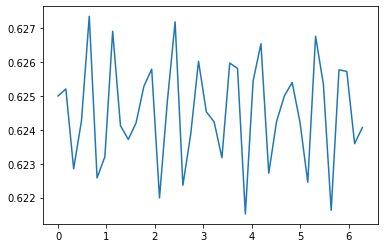

In [131]:
N = 50

m = 1
k = 1
w0 =  np.sqrt(k/m) *2*np.pi

# Relative spring constant modulation
eps =  0.1

a = destroy(N)

x = (a+a.dag())
p = -1j*(a-a.dag())/2

H0  = 0.5*k*x**2 + p**2/2/m
H1 = 0.5*eps*k*x**2

def f(t, args):
    return np.cos(2*w0*t)

# Benchmark: check with time independent Hamiltonian and a coherent state
#H = H0
#psi0 = coherent(N,1)

# Now try including spring constant modulation
H  =  [H0, [H1, f]]
psi0 = fock(N,0)

t =  np.linspace(0,2*np.pi,40)
results = sesolve(H, psi0, t)

plt.plot(t,expect(H0, results.states))

In [132]:
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['animation.embed_limit'] = 100

fig, ax = plt.subplots(1, 1, figsize=(6,6))
def update(n):
    ax.cla() # Clear axis. Without this, generating the animation takes a lot longer...
    plot_wigner(results.states[n],fig=fig,ax=ax)
    print("%d " % n, end='')

anim = animation.FuncAnimation(fig, update, frames=len(results.states))
plt.close(fig)

In [133]:
anim

0 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 